In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
df = pd.read_csv(r'C:\Users\sreeh\MLAI\Datasets\Diabetes.csv')

In [3]:
# Displaying a sample of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Checking the shape of the dataset
df.shape

(768, 9)

In [5]:
# Checking for null values in the dataset
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Checking the 5 number summary of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The following features have 0 as the minimum values, Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin and BMI.

Except Pregnancies, other features cannot realistically have 0 as their minumum values. Hence we will consider them as missing values and treat them accordingly.

In [7]:
# Checking the number of zeroes in each feature
(df==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [8]:
zero_cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [9]:
# Replacing 0 with NaN
df[zero_cols] = df[zero_cols].replace(0,np.NaN)

In [10]:
# Checking the null values in each column
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

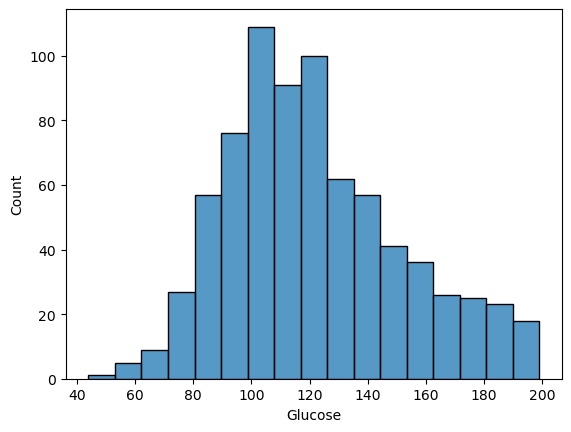

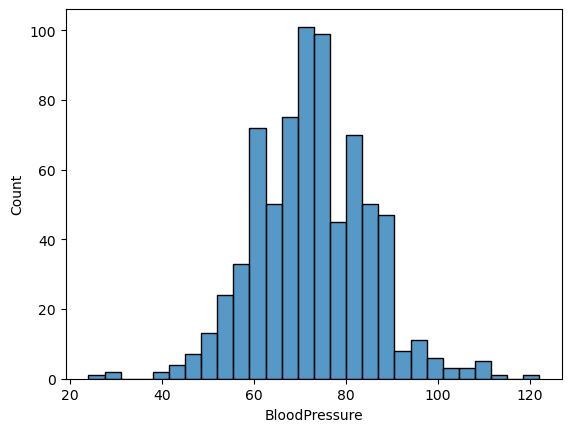

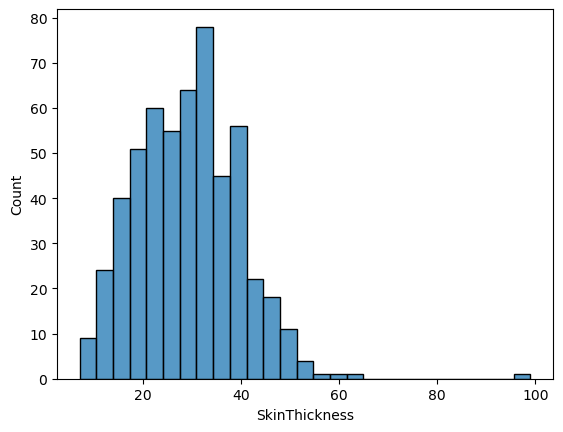

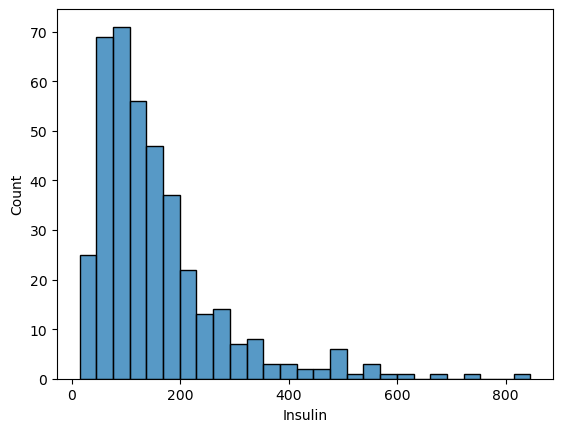

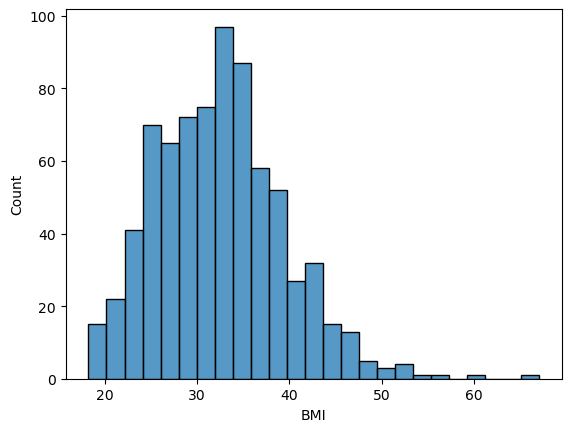

In [11]:
for i in zero_cols:
    sns.histplot(data=df, x =i)
    plt.show()

In [12]:
# Some columns are noramlly distributed while others are skewed.
# As the dataset is very small, we will use Median to fill the null values.
# Calculate the median values for each column according to the value in Outcome.
median_values = df.groupby('Outcome')[zero_cols].median()

In [13]:
# Define a function to fill null values using median
def fill_nulls(row):
    outcome = row['Outcome']
    for col in zero_cols:
        if pd.isnull(row[col]):
            row[col] = median_values.loc[outcome, col]
    return row

In [14]:
# Apply the function to fill nulls
df = df.apply(fill_nulls, axis=1)

In [15]:
# Check if we missed any null values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
# Checking for outliers
num_cols = df.drop('Outcome',axis=1).columns

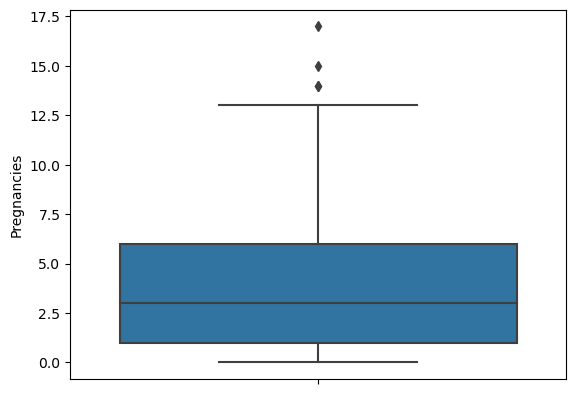

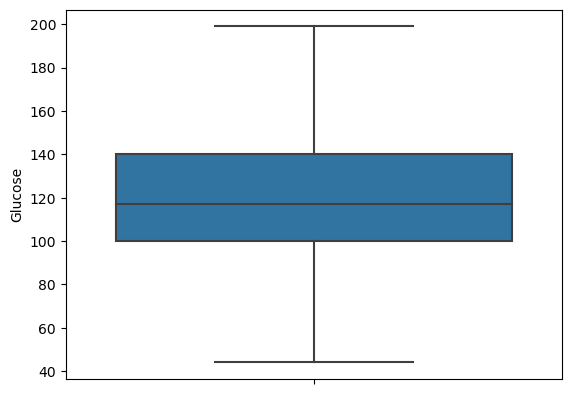

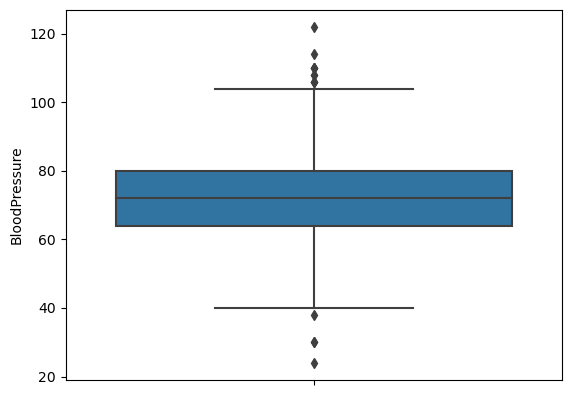

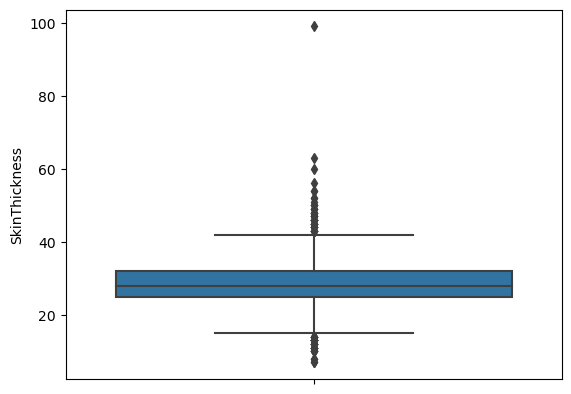

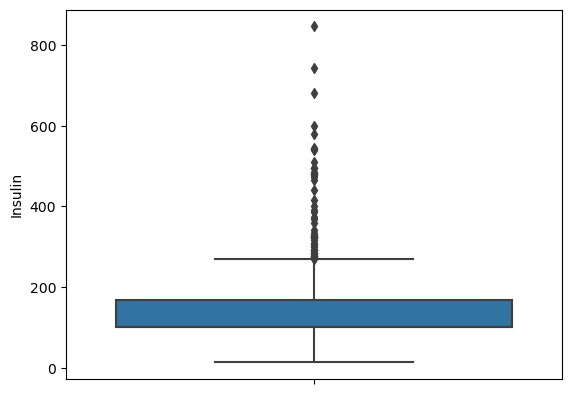

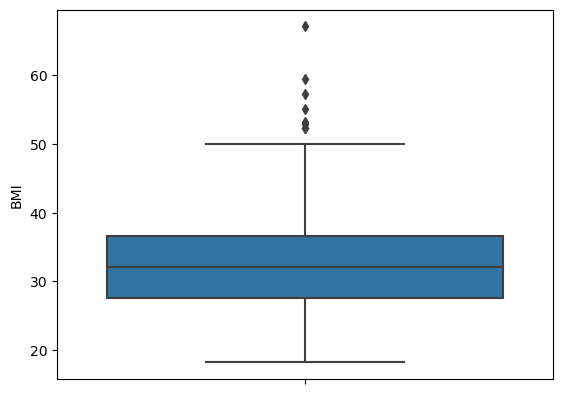

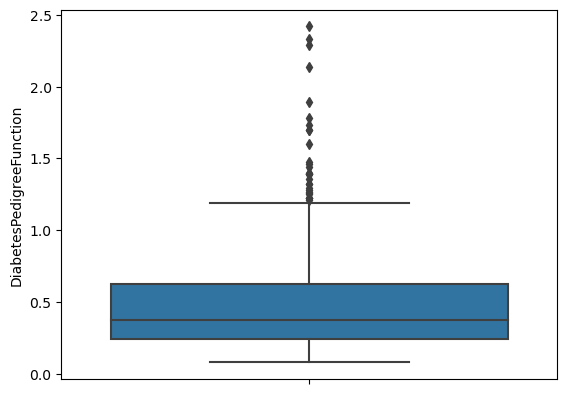

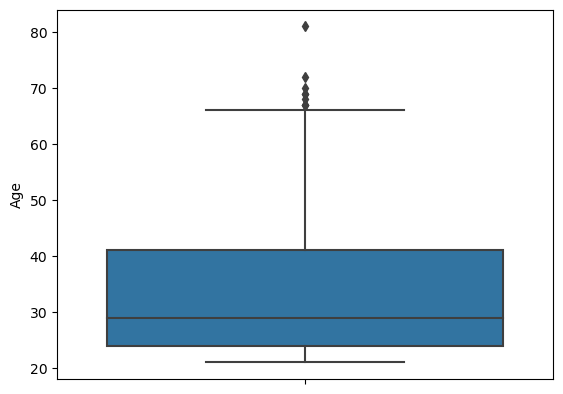

In [17]:
for j in num_cols:
    sns.boxplot(data = df, y = j)
    plt.show()

While there are a few outliers, we will not handle them as it is medical data.

In [18]:
# Separating the data into independent and target features.
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [19]:
# Checking how the outcome is distributed.
y.value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

In [20]:
# The data is imbalanced. So we will use SMOTE to create a balanced dataset.
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=33)
X, y= smote.fit_resample(X, y)

In [21]:
y.value_counts()

1.0    500
0.0    500
Name: Outcome, dtype: int64

Now the dataset is balanced.

In [22]:
# Using Standardscaler for scaling for Logistic Regression, kNN and SVM as the outliers are not extreme and to preserve the nature of the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [23]:
# Splitting the dataset into Training and testing datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [24]:
# Creating a Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(X_train,y_train)
lr_ypred = model.predict(X_test)

In [25]:
# Importing the necessary metric to assess the model
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [26]:
print("Accuracy = ",accuracy_score(y_test,lr_ypred))
print("Precision = ",precision_score(y_test,lr_ypred))
print("Recall = ",recall_score(y_test,lr_ypred))
print("F1 Score", f1_score(y_test,lr_ypred))

Accuracy =  0.845
Precision =  0.8137254901960784
Recall =  0.8736842105263158
F1 Score 0.8426395939086295


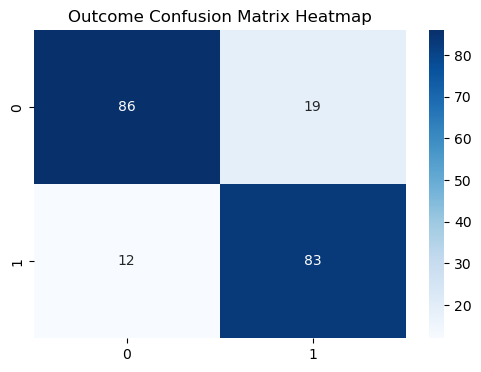

In [27]:
# Creating a confusion matrix heatmap
conf_matrix = confusion_matrix(y_test,lr_ypred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Outcome Confusion Matrix Heatmap')
plt.show()

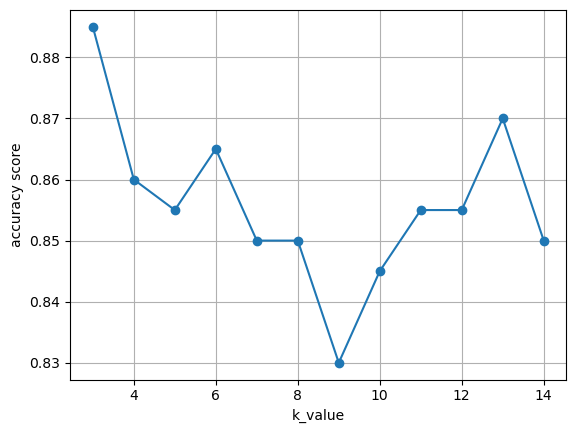

In [28]:
# Creating a kNN model.
# Checking which value of K gives the highest accuracy.
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric ='minkowski', p=2) # 1 manhattan, 2 euclidian
    classifier.fit(X_train,y_train)
    y_pred_knn = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k_value')
plt.ylabel('accuracy score')
plt.grid()
plt.show()

In [29]:
# Using the value of k as 3.
classifier = KNeighborsClassifier(n_neighbors = 3, metric ='minkowski', p=2)
k_model = classifier.fit(X_train,y_train)
y_pred_knn = k_model.predict(X_test)

In [30]:
# Checking the accuracy metrics
print("Accuracy = ",accuracy_score(y_test,y_pred_knn))
print("Precision = ",precision_score(y_test,y_pred_knn))
print("Recall = ",recall_score(y_test,y_pred_knn))
print("F1 Score", f1_score(y_test,y_pred_knn))

Accuracy =  0.885
Precision =  0.8461538461538461
Recall =  0.9263157894736842
F1 Score 0.8844221105527639


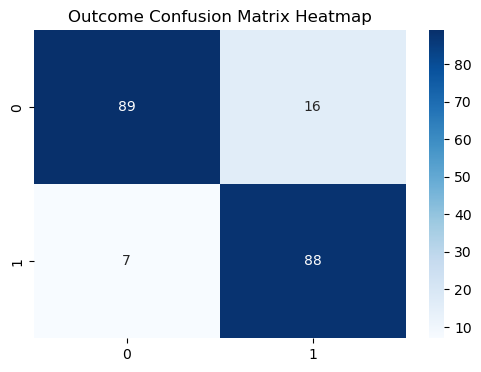

In [31]:
# Creating a confusion matrix heatmap
conf_matrix = confusion_matrix(y_test,y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Outcome Confusion Matrix Heatmap')
plt.show()

In [32]:
# Creating a SVM model
from sklearn.svm import SVC
svmclf = SVC(kernel = 'linear')
svm_model = svmclf.fit(X_train,y_train)
y_pred_svm = svm_model.predict(X_test)

In [33]:
# Checking the accuracy metrics
print("Accuracy = ",accuracy_score(y_test,y_pred_svm))
print("Precision = ",precision_score(y_test,y_pred_svm))
print("Recall = ",recall_score(y_test,y_pred_svm))
print("F1 Score", f1_score(y_test,y_pred_svm))

Accuracy =  0.865
Precision =  0.8148148148148148
Recall =  0.9263157894736842
F1 Score 0.8669950738916257


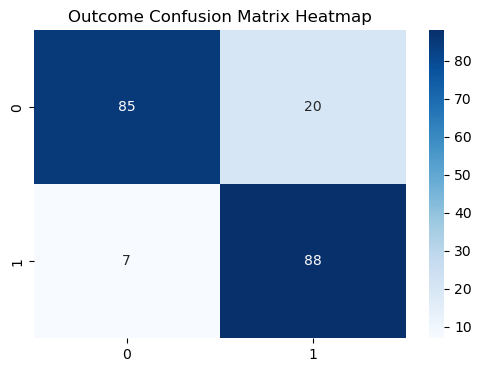

In [34]:
# Creating a confusion matrix heatmap
conf_matrix = confusion_matrix(y_test,y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Outcome Confusion Matrix Heatmap')
plt.show()

In [35]:
# Creating a Naive Bayes Classifier model
# Scaling is not necessary for the model.
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_model = gnb.fit(X_train,y_train)
y_pred_gnb = gnb_model.predict(X_test)

In [36]:
# Checking the accuracy metrics
print("Accuracy = ",accuracy_score(y_test,y_pred_gnb))
print("Precision = ",precision_score(y_test,y_pred_gnb))
print("Recall = ",recall_score(y_test,y_pred_gnb))
print("F1 Score", f1_score(y_test,y_pred_gnb))

Accuracy =  0.815
Precision =  0.8152173913043478
Recall =  0.7894736842105263
F1 Score 0.802139037433155


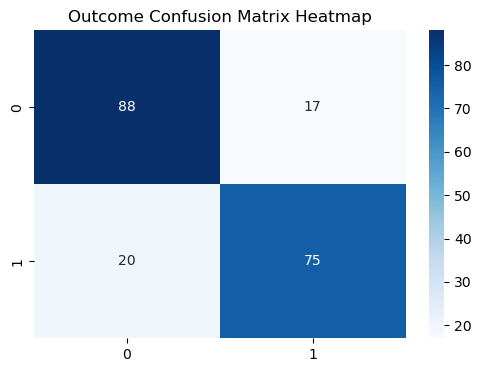

In [37]:
# Creating a confusion matrix heatmap
conf_matrix = confusion_matrix(y_test,y_pred_gnb)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Outcome Confusion Matrix Heatmap')
plt.show()

In [38]:
# Printing the summary.
models = ['Logistic Regression', 'kNN', 'SVM', 'Naive Bayes']
accuracy = [accuracy_score(y_test,lr_ypred),accuracy_score(y_test,y_pred_knn),accuracy_score(y_test,y_pred_svm),accuracy_score(y_test,y_pred_gnb)]
summary = pd.DataFrame({"Models":models, "Accuracy":accuracy})
summary

,Models,Accuracy
0,Logistic Regression,0.845
1,kNN,0.885
2,SVM,0.865
3,Naive Bayes,0.815
